In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
#reading the dataset
import pandas as pd
import numpy as np

AdClickData = pd.read_csv('G:\ML PROJECTS\AD Click Predictor\Ad click Data.csv')
print('Shape before deleting duplicates', AdClickData.shape)

AdClickData = AdClickData.drop_duplicates()
print('Shape after deleting duplicates', AdClickData.shape)

AdClickData.head()

Shape before deleting duplicates (6657, 14)
Shape after deleting duplicates (6657, 14)


,VistID,Time_Spent,Age,Avg_Income,Internet_Usage,Ad_Topic,Country_Name,City_code,Male,Time_Period,Weekday,Month,Year,Clicked
0,5183153,87.97,43,55901.12,185.46,product_11,Serbia,City_5,No,Mid-Night,Thursday,July,2020,0
1,4023265,51.63,50,39132.00,176.73,product_8,Turkmenistan,City_1,No,Evening,Saturday,June,2020,1
2,4708083,82.37,38,57032.36,210.60,product_6,Northern Mariana Islands,City_2,No,Morning,Tuesday,January,2020,0
3,9771815,62.06,45,48868.00,190.05,product_19,South Africa,City_3,Yes,Morning,Thursday,April,2020,1
4,6451317,77.66,31,61608.23,204.86,product_11,Guadeloupe,City_2,No,Noon,Thursday,January,2020,0


Determining the type of Machine Learning
Based on the problem statement you can understand that we need to create a supervised ML classification model, as the target variable is categorical.



**Looking at the distribution of Target variable**


<AxesSubplot:xlabel='Clicked'>

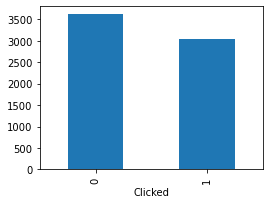

In [5]:
%matplotlib inline

GroupedData = AdClickData.groupby('Clicked').size()
GroupedData.plot(kind='bar',figsize=(4,3))

The Target variable data looks balanced to we can go ahead


**Basic Data Exploration**


In [6]:
AdClickData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6657 entries, 0 to 6656
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   VistID          6657 non-null   int64  
 1   Time_Spent      6657 non-null   float64
 2   Age             6657 non-null   int64  
 3   Avg_Income      6657 non-null   float64
 4   Internet_Usage  6657 non-null   float64
 5   Ad_Topic        6657 non-null   object 
 6   Country_Name    6657 non-null   object 
 7   City_code       6657 non-null   object 
 8   Male            6657 non-null   object 
 9   Time_Period     6657 non-null   object 
 10  Weekday         6657 non-null   object 
 11  Month           6657 non-null   object 
 12  Year            6657 non-null   int64  
 13  Clicked         6657 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 780.1+ KB


In [7]:
AdClickData.nunique()

VistID            6657
Time_Spent         900
Age                 43
Avg_Income        1487
Internet_Usage     966
Ad_Topic            30
Country_Name       237
City_code            9
Male                 2
Time_Period          6
Weekday              7
Month                7
Year                 1
Clicked              2
dtype: int64

In [9]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is 
# likely to be a category otherwise continuous

***Basic Data Exploration Results***
Based on the basic exploration above, you can now create a simple report of the data, noting down your observations regaring each column. Hence, creating a initial roadmap for further analysis.

The selected columns in this step are not final, further study will be done and then a final list will be created

VistID: Qualitative. Rejected. This column does not affect the ad click
Time_Spent: Continuous. Selected.
Age: Continuous. Selected.
Area_Income: Continuous. Selected.
Internet_Usage: Continuous. Selected.
Ad_Topic: Categorical. Selected.
Country_Name: Qualitative. Rejected. This column has very high cardinality
City_Code: Categorical. Selected.
Male: Categorical. Selected.
Time_Period: Categorical. Selected.
    
Weekday: Categorical. Selected.
Month: Categorical. Selected.
Year: Qualitative. Rejected. This column does not affect the ad click.
Clicked: Categorical. Selected. This is the Target Variable!

**Removing rejected columns


In [8]:
UselessColumns = ["VistID", "Country_Name" , "Year"]
AdClickData = AdClickData.drop(UselessColumns,axis=1)
AdClickData.head()


,Time_Spent,Age,Avg_Income,Internet_Usage,Ad_Topic,City_code,Male,Time_Period,Weekday,Month,Clicked
0,87.97,43,55901.12,185.46,product_11,City_5,No,Mid-Night,Thursday,July,0
1,51.63,50,39132.00,176.73,product_8,City_1,No,Evening,Saturday,June,1
2,82.37,38,57032.36,210.60,product_6,City_2,No,Morning,Tuesday,January,0
3,62.06,45,48868.00,190.05,product_19,City_3,Yes,Morning,Thursday,April,1
4,77.66,31,61608.23,204.86,product_11,City_2,No,Noon,Thursday,January,0


***Visualize distribution of all the Categorical Predictor variables in the data using bar plots***

Categorical Predictors: "Ad_Topic", "City_code", "Male" ,"Time_Period", "Weekday", "Month"

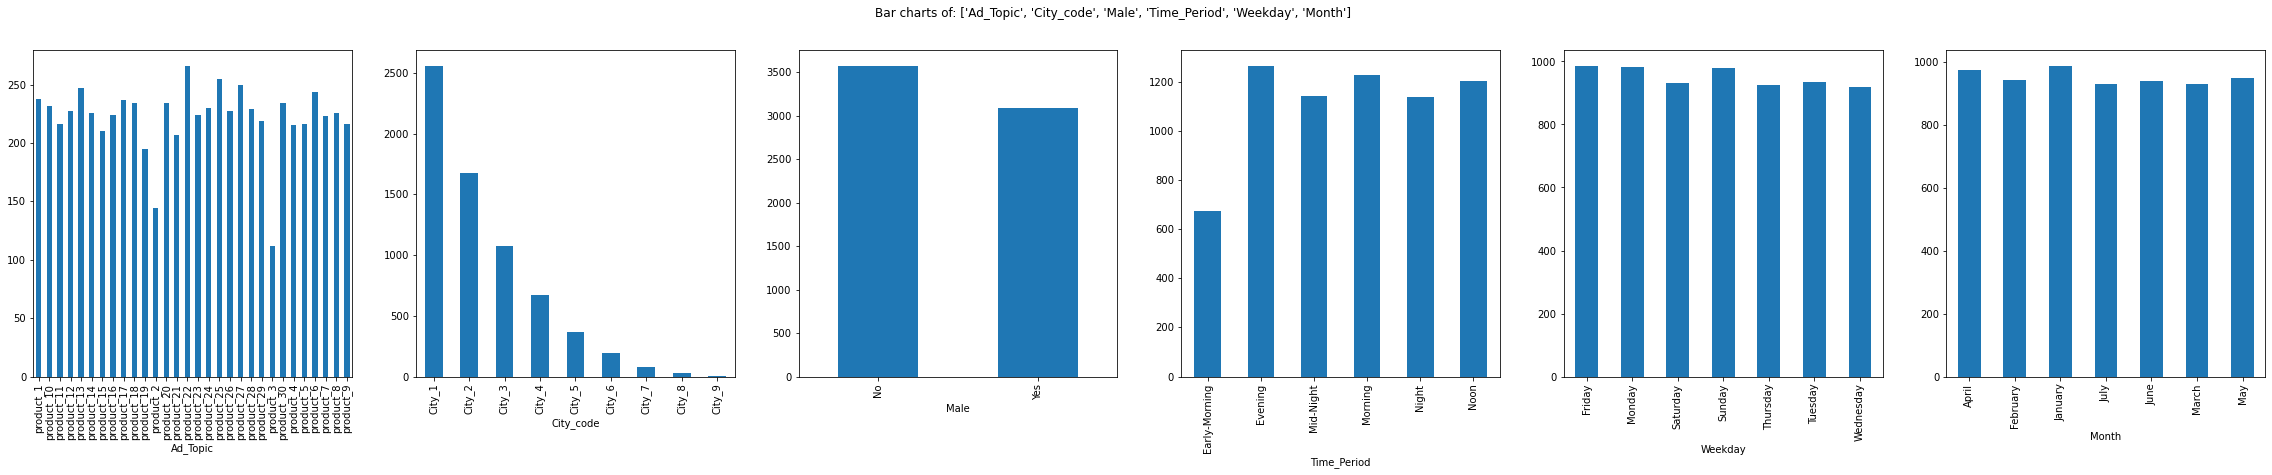

In [9]:
#defining a function to print multiple bar plots at once
def PlotBarCharts(inpdata,colsToPlots):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlots), figsize=(40,6))
    fig.suptitle('Bar charts of: '+ str(colsToPlots))

    for colName, plotNumber in zip(colsToPlots, range(len(colsToPlots))):
        inpdata.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])
#calling the function
PlotBarCharts(inpdata=AdClickData, colsToPlots=["Ad_Topic","City_code", "Male",
                                               "Time_Period", "Weekday","Month"])

There is no columns that is too skewed every columns have balanced bar plots so we using all the categorical colums


***Visualize distribution of all the Continuous Predictor variables in the data using histograms***
Based on the Basic Data Exploration, Four continuous predictor variables were found "Time_Spent", "Age", "Avg_Income" and "Internet_Usage"


array([[<AxesSubplot:title={'center':'Time_Spent'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Avg_Income'}>,
        <AxesSubplot:title={'center':'Internet_Usage'}>]], dtype=object)

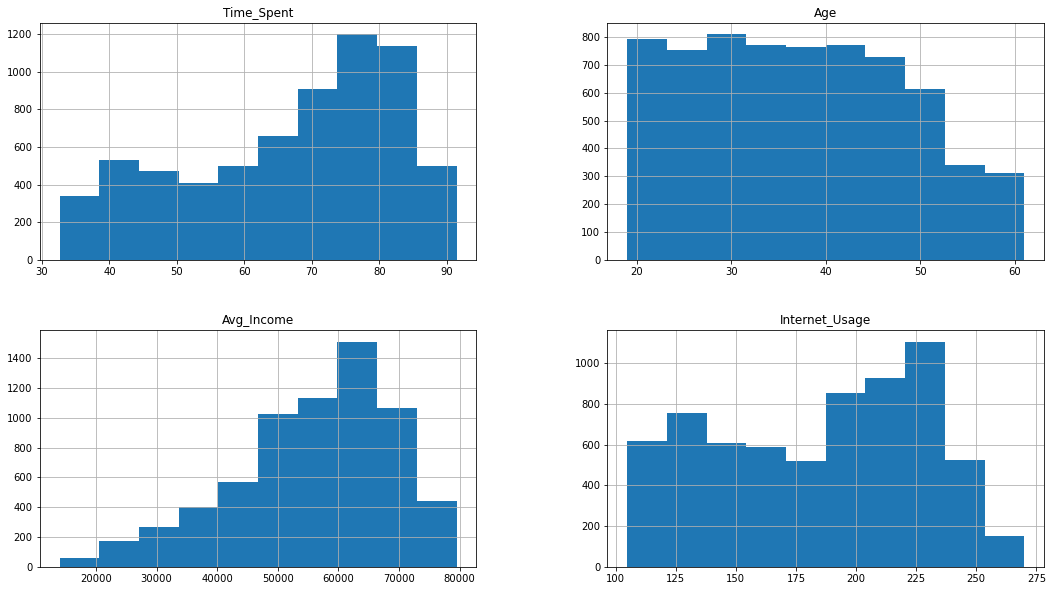

In [10]:
#plotting histogram for different colums
AdClickData.hist(['Time_Spent','Age','Avg_Income','Internet_Usage'],figsize=(18,10))


Selected Continuous Variables:

Time_Spent : Selected.
Age: Selected.
Avg_Income: Selected. Slightly negative skewed distribution, acceptable.
Internet_Usage: Selected.


***Checking for any missing value and fixing it***


In [11]:
AdClickData.isnull().sum()

Time_Spent        0
Age               0
Avg_Income        0
Internet_Usage    0
Ad_Topic          0
City_code         0
Male              0
Time_Period       0
Weekday           0
Month             0
Clicked           0
dtype: int64

In this data none of the columns have any missing values hence missing value treatment is not required.


****Feature Selection****
Statistical measurement of relationship strength between variables
Continuous Vs Continuous ---- Correlation matrix
Categorical Vs Continuous---- ANOVA test
Categorical Vs Categorical--- Chi-Square test



In this case study the Target variable is categorical, hence below two scenarios will be present

Categorical Target Variable Vs Continuous Predictor
Categorical Target Variable Vs Categorical Predictor

***Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test***


In [12]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [13]:
# Calling the function to check which categorical variables are correlated with target
ContinuousVariables=["Time_Spent", "Age", "Avg_Income", "Internet_Usage"]
FunctionAnova(inpData=AdClickData, TargetVariable='Clicked', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

Time_Spent is correlated with Clicked | P-Value: 0.0
Age is correlated with Clicked | P-Value: 6.40789044460054e-91
Avg_Income is correlated with Clicked | P-Value: 0.0
Internet_Usage is correlated with Clicked | P-Value: 0.0


['Time_Spent', 'Age', 'Avg_Income', 'Internet_Usage']

ANOVA test shows all Four columns are correlated with Clicked (Target Variable).


***Statistical Feature Selection (Categorical Vs Categorical) using Chi-Square Test***


In [14]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [15]:
CategoricalVariables=["Ad_Topic","City_code", "Male",
                     "Time_Period", "Weekday","Month"]

# Calling the function
FunctionChisq(inpData=AdClickData, 
              TargetVariable='Clicked',
              CategoricalVariablesList= CategoricalVariables)

Ad_Topic is correlated with Clicked | P-Value: 1.2676573604736464e-24
City_code is correlated with Clicked | P-Value: 2.6667953391697526e-88
Male is correlated with Clicked | P-Value: 0.02695171301745074
Time_Period is correlated with Clicked | P-Value: 4.465745015735695e-47
Weekday is NOT correlated with Clicked | P-Value: 0.7226317326250824
Month is NOT correlated with Clicked | P-Value: 0.4229049097263303


['Ad_Topic', 'City_code', 'Male', 'Time_Period']

Based on the results of Chi-Square test, below categorical columns are selected as predictors for Machine Learning

'Ad_Topic', 'City_code', 'Male', 'Time_Period'








In [16]:
#selecting the final predictors
SelectedColumns=["Time_Spent", "Age", "Avg_Income", "Internet_Usage",
                "Ad_Topic", "City_code", "Male", "Time_Period"]

# Selecting final columns
DataForML=AdClickData[SelectedColumns]
DataForML.head()


,Time_Spent,Age,Avg_Income,Internet_Usage,Ad_Topic,City_code,Male,Time_Period
0,87.97,43,55901.12,185.46,product_11,City_5,No,Mid-Night
1,51.63,50,39132.00,176.73,product_8,City_1,No,Evening
2,82.37,38,57032.36,210.60,product_6,City_2,No,Morning
3,62.06,45,48868.00,190.05,product_19,City_3,Yes,Morning
4,77.66,31,61608.23,204.86,product_11,City_2,No,Noon


In [17]:
#saving data in pkl file
DataForML.to_pickle('DataForML.pkl')

**Data Preprocessing**

converting the binary nominal variable to numeric using 1/0 mapping


In [18]:
DataForML['Male'].replace({'Yes':1,'No':0},inplace=True)

DataForML.head()

,Time_Spent,Age,Avg_Income,Internet_Usage,Ad_Topic,City_code,Male,Time_Period
0,87.97,43,55901.12,185.46,product_11,City_5,0,Mid-Night
1,51.63,50,39132.00,176.73,product_8,City_1,0,Evening
2,82.37,38,57032.36,210.60,product_6,City_2,0,Morning
3,62.06,45,48868.00,190.05,product_19,City_3,1,Morning
4,77.66,31,61608.23,204.86,product_11,City_2,0,Noon


**Splitting the data into test and train set


In [19]:
TargetVariable = 'Clicked'
#Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['Clicked']=AdClickData['Clicked']

Predictors=['Time_Spent', 'Age', 'Avg_Income', 'Internet_Usage', 'Male',
       'Ad_Topic_product_1', 'Ad_Topic_product_10', 'Ad_Topic_product_11',
       'Ad_Topic_product_12', 'Ad_Topic_product_13', 'Ad_Topic_product_14',
       'Ad_Topic_product_15', 'Ad_Topic_product_16', 'Ad_Topic_product_17',
       'Ad_Topic_product_18', 'Ad_Topic_product_19', 'Ad_Topic_product_2',
       'Ad_Topic_product_20', 'Ad_Topic_product_21', 'Ad_Topic_product_22',
       'Ad_Topic_product_23', 'Ad_Topic_product_24', 'Ad_Topic_product_25',
       'Ad_Topic_product_26', 'Ad_Topic_product_27', 'Ad_Topic_product_28',
       'Ad_Topic_product_29', 'Ad_Topic_product_3', 'Ad_Topic_product_30',
       'Ad_Topic_product_4', 'Ad_Topic_product_5', 'Ad_Topic_product_6',
       'Ad_Topic_product_7', 'Ad_Topic_product_8', 'Ad_Topic_product_9',
       'City_code_City_1', 'City_code_City_2', 'City_code_City_3',
       'City_code_City_4', 'City_code_City_5', 'City_code_City_6',
       'City_code_City_7', 'City_code_City_8', 'City_code_City_9',
       'Time_Period_Early-Morning', 'Time_Period_Evening',
       'Time_Period_Mid-Night', 'Time_Period_Morning', 'Time_Period_Night',
       'Time_Period_Noon']


In [20]:
X = DataForML_Numeric[Predictors].values
y = DataForML_Numeric[TargetVariable].values

In [21]:
#splitting into test and train data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=428)

***Normalisation of data***


In [22]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
# On this data Min Max Normalization produced better results
PredictorScaler = MinMaxScaler()
PredictorScalerFit = PredictorScaler.fit(X)
X = PredictorScalerFit.transform(X)

#saving the normalization scaler
import pickle
import os
with open('PredictorScaler.pkl','wb') as fileWriteStream:
    pickle.dump(PredictorScaler,fileWriteStream)
    fileWriteStream.close()
    
print('pickle file of Predictive Model Scaler is saved at Location:',os.getcwd())


#splitting into test and train data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=428)

pickle file of Predictive Model Scaler is saved at Location: C:\Users\sanya\Documents


In [23]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4659, 50)
(4659,)
(1998, 50)
(1998,)


***TRAINING THE DATA WITH SVM***


In [24]:
from sklearn import svm
clf = svm.SVC(C=3,kernel='rbf',gamma=0.1)

print(clf)

#creating the model on Training data
SVM = clf.fit(X_train,y_train)
prediction = SVM.predict(X_test)

#measuring the accuracy
from sklearn import metrics
print(metrics.classification_report(y_test,prediction))
print(metrics.confusion_matrix(y_test,prediction))

#printing the overall accuracy 
F1_score = metrics.f1_score(y_test,prediction,average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_score,2))



SVC(C=3, gamma=0.1)
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1097
           1       0.97      0.88      0.92       901

    accuracy                           0.93      1998
   macro avg       0.94      0.93      0.93      1998
weighted avg       0.93      0.93      0.93      1998

[[1069   28]
 [ 111  790]]
Accuracy of the model on Testing Sample Data: 0.93


***Retraning the model with 100% data***


In [25]:
TargetVariable = 'Clicked'
# Best predictors based on the multiple variable importance charts above
Predictors=["Time_Spent", "Avg_Income", "Internet_Usage"]

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values


In [26]:
#SVM
from sklearn import svm
clf = svm.SVC(C=3,kernel='rbf',gamma=0.1)
SVM = clf.fit(X,y)


In [27]:
#saving the model as pkl file
import pickle
import os
with open('finalSVM.pkl','wb') as fileWriteStream:
    pickle.dump(SVM,fileWriteStream)
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: C:\Users\sanya\Documents
